<a href="https://colab.research.google.com/github/owen198/csc_domain_adaptation/blob/main/csc_datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import random

from sklearn import preprocessing
from sklearn import svm
from sklearn import cluster
import pandas as pd
import datetime

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from keras import metrics
from keras import models
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from keras.layers import Input, BatchNormalization, Activation
from keras.callbacks import EarlyStopping

In [2]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [3]:
path = './gdrive/My Drive/data/CSC/W4/'

In [4]:
drop_list = ['_id','type','scada','timestamp','device', 'datetime']

In [5]:
oneClass_predictor = svm.OneClassSVM(nu=0.01, kernel="rbf", gamma=0.01)

In [6]:
def normalization (normal_df):
    
    min_max_scaler = preprocessing.MinMaxScaler()
    feature_names = list(normal_df)
    
    min_max_scaler = min_max_scaler.fit(normal_df.values)
    X_raw_minmax = min_max_scaler.transform(normal_df.values)
    normal_df = pd.DataFrame(X_raw_minmax, columns=feature_names)

    #X_raw_minmax = min_max_scaler.fit_transform(normal_df.values)
    #normal_df = pd.DataFrame(X_raw_minmax, columns=feature_names)
    
    return normal_df, min_max_scaler

In [7]:
def scorer_(Y_pred):
    a = (Y_pred[Y_pred == -1].size)/(Y_pred.size)
    return a*100

In [8]:
def plot_trend(data_df, 
               s_date, 
               e_date, 
               normalizer,
               predict_model):

    delta = datetime.timedelta(days=1)

    score_list = []
    datetime_list = []

    while s_date <= e_date:

        validation_df = data_df[(data_df['datetime'] > s_date) & 
                                (data_df['datetime'] <= s_date + delta)]


        if len(validation_df) > 0:
        
            validation_df = validation_df.drop(columns=drop_list)
            validation_df = normalizer.transform(validation_df)
            validation_df = predict_model.predict(validation_df)

            score_list.append(scorer_(validation_df))
            datetime_list.append(s_date)

            #print(s_date, scorer_(validation_df))

        s_date += delta

    
    # plot
    fig, ax = plt.subplots(figsize=(10, 3))
    plt.xticks(rotation=45)
    #index = -100

    ax.plot(datetime_list, score_list, marker='.')
    ax.set(xlabel='date', ylabel='score')
    ax.set_ylim([0, 100])

    #ax.legend()
    ax.grid()
    plt.tight_layout()
    #fig.savefig('score.png', dpi=300)

    #fig.savefig(path+tag+'-'+training_from.strftime("%Y%m%d")+'-'+training_to.strftime("%Y%m%d")+'.png', dpi=300)
    plt.show()

In [9]:
def check_duration(data_df, training_from, training_to, e_date):

    data_df['datetime'] = data_df['timestamp'].astype('int').astype("datetime64[s]")

    training_df = data_df[(data_df['datetime'] > training_from) &
                          (data_df['datetime'] < training_to)]

    training_df = training_df.drop(columns=drop_list)
    training_df, normalizer = normalization(training_df)
    predict_model = oneClass_predictor.fit(training_df)

    plot_trend (data_df, training_from, e_date, normalizer, predict_model)

    return data_df


# Check Abnormal Duration

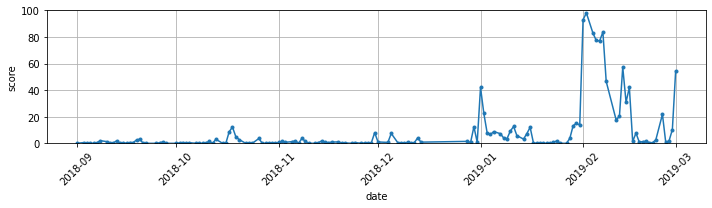

43518


In [10]:
W4633070102 = pd.concat([pd.read_csv(path+'W4633070102'+'_201809.csv'),
                         pd.read_csv(path+'W4633070102'+'_201810.csv'),
                         pd.read_csv(path+'W4633070102'+'_201811.csv'),
                         pd.read_csv(path+'W4633070102'+'_201812.csv'),
                         pd.read_csv(path+'W4633070102'+'_201901.csv'),
                         pd.read_csv(path+'W4633070102'+'_201902.csv'),
                         pd.read_csv(path+'W4633070102'+'_201903.csv')])

check_duration (W4633070102, 
                datetime.datetime(2018,9,1,0,0), 
                datetime.datetime(2018,12,1,0,0), 
                datetime.datetime(2019,3,1,0,0))

print(len(W4633070102))

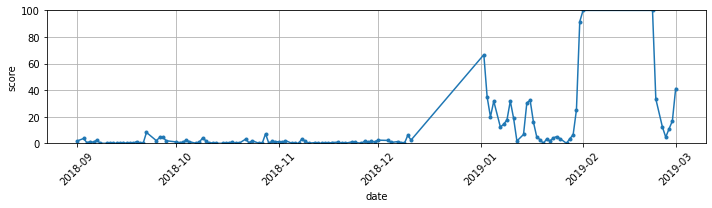

27559


In [22]:
W4633080500 = pd.concat([pd.read_csv(path+'W4633080500'+'_201809.csv'),
                         pd.read_csv(path+'W4633080500'+'_201810.csv'),
                         pd.read_csv(path+'W4633080500'+'_201811.csv'),
                         pd.read_csv(path+'W4633080500'+'_201812.csv'),
                         pd.read_csv(path+'W4633080500'+'_201901.csv'),
                         pd.read_csv(path+'W4633080500'+'_201902.csv'),
                         pd.read_csv(path+'W4633080500'+'_201903.csv')])

check_duration (W4633080500, 
                datetime.datetime(2018,9,1,0,0), 
                datetime.datetime(2018,12,1,0,0), 
                datetime.datetime(2019,3,1,0,0))

print(len(W4633080500))

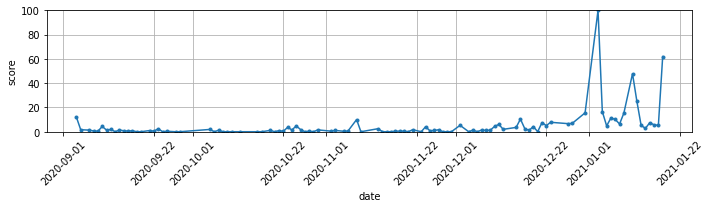

17017


In [12]:
W4633080200 = pd.concat([pd.read_csv(path+'W4633080200'+'_202009.csv'),
                         pd.read_csv(path+'W4633080200'+'_202010.csv'),
                         pd.read_csv(path+'W4633080200'+'_202011.csv'),
                         pd.read_csv(path+'W4633080200'+'_202012.csv'),
                         pd.read_csv(path+'W4633080200'+'_202101.csv')])

check_duration (W4633080200, 
                datetime.datetime(2020,9,1,0,0), 
                datetime.datetime(2020,12,1,0,0), 
                datetime.datetime(2021,2,1,0,0))

print(len(W4633080200))

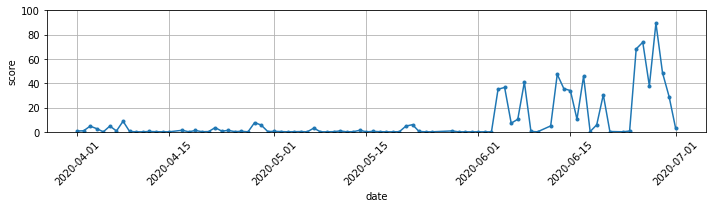

100873


In [13]:
W4662FM0400 = pd.concat([pd.read_csv(path+'W4662FM0400'+'_202003.csv'),
                         pd.read_csv(path+'W4662FM0400'+'_202004.csv'),
                         pd.read_csv(path+'W4662FM0400'+'_202005.csv'),
                         pd.read_csv(path+'W4662FM0400'+'_202006.csv'),
                         pd.read_csv(path+'W4662FM0400'+'_202007.csv')])

check_duration (W4662FM0400, 
                datetime.datetime(2020,4,1,0,0), 
                datetime.datetime(2020,6,1,0,0), 
                datetime.datetime(2020,7,1,0,0))

print(len(W4662FM0400))

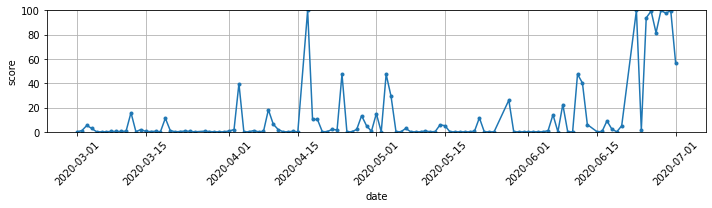

60900


In [18]:
W4662FM0605 = pd.concat([pd.read_csv(path+'W4662FM0605'+'_202003.csv'),
                         pd.read_csv(path+'W4662FM0605'+'_202004.csv'),
                         pd.read_csv(path+'W4662FM0605'+'_202005.csv'),
                         pd.read_csv(path+'W4662FM0605'+'_202006.csv'),
                         pd.read_csv(path+'W4662FM0605'+'_202007.csv')])

check_duration (W4662FM0605, 
                datetime.datetime(2020,3,1,0,0), 
                datetime.datetime(2020,4,1,0,0), 
                datetime.datetime(2020,7,1,0,0))

print(len(W4662FM0605))

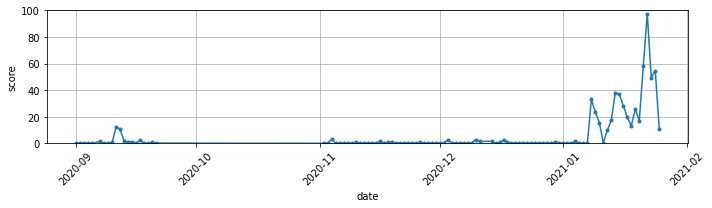

51829


In [15]:
W4662FM0606 = pd.concat([pd.read_csv(path+'W4662FM0606'+'_202009.csv'),
                         pd.read_csv(path+'W4662FM0606'+'_202010.csv'),
                         pd.read_csv(path+'W4662FM0606'+'_202011.csv'),
                         pd.read_csv(path+'W4662FM0606'+'_202012.csv'),
                         pd.read_csv(path+'W4662FM0606'+'_202101.csv'),
                         pd.read_csv(path+'W4662FM0606'+'_202102.csv')])

check_duration (W4662FM0606, 
                datetime.datetime(2020,9,1,0,0), 
                datetime.datetime(2021,1,1,0,0), 
                datetime.datetime(2021,2,1,0,0))

print(len(W4662FM0606))

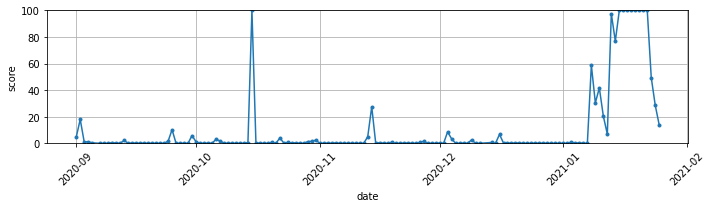

65874


In [16]:
W4662FM0507 = pd.concat([pd.read_csv(path+'W4662FM0507'+'_202009.csv'),
                         pd.read_csv(path+'W4662FM0507'+'_202010.csv'),
                         pd.read_csv(path+'W4662FM0507'+'_202011.csv'),
                         pd.read_csv(path+'W4662FM0507'+'_202012.csv'),
                         pd.read_csv(path+'W4662FM0507'+'_202101.csv'),
                         pd.read_csv(path+'W4662FM0507'+'_202102.csv')])

check_duration (W4662FM0507, 
                datetime.datetime(2020,9,1,0,0), 
                datetime.datetime(2021,1,1,0,0), 
                datetime.datetime(2021,2,1,0,0))

print(len(W4662FM0507))